In [60]:
import pandas as pd
import seaborn as sns

In [6]:
df_mat = pd.read_csv("student/student-mat.csv", sep=';')
df_por = pd.read_csv("student/student-por.csv", sep=';')

In [40]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Hipoteza 1: Uczniowie z mniejszych rodzin mają lepsze oceny końcowe

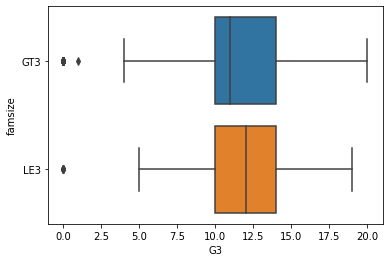

In [16]:
df_mat_por = pd.concat([df_mat,df_por])
sns.boxplot(x="G3", y="famsize", data=df_mat_por)
plt.show()

Z boxplotu widać, że mediana ocen rzeczywiście jest wyższa w mniejszych rodzinach (LE3 - less or equal to 3), ale same "pudełka" są właściwie w identycznych miejsach, a dodatkowo dla GT3 prawy wąs jest bardziej na prawo.

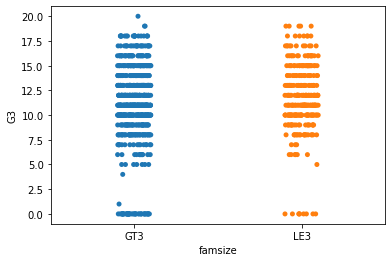

In [19]:
sns.stripplot(x="famsize", y="G3", data=df_mat_por)
plt.show()

Widać, że oceny końcowe rozkładają się w bardzo podobny sposób. Z obu stworzonych wykresów raczej można odrzucić postawioną hipotezę.

## Hipoteza 2: Uczniowie z wyższymi ocenami z pierwszego semestru (G1) mają lepsze oceny także w drugim semestrze (G2)

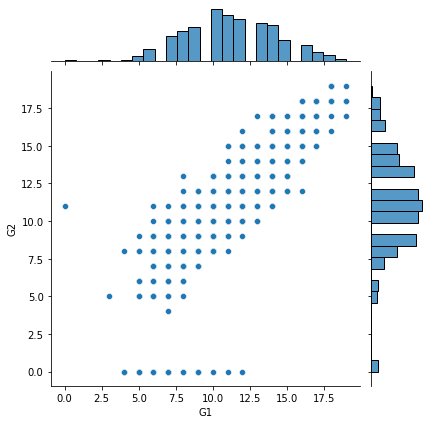

In [29]:
sns.jointplot(data=df_mat_por, x="G1", y="G2")
plt.show()

Łatwo zauważyć korelację między ocenami G1 i G2, zatem nie ma podstaw do odrzucenia tej hipotezy.

## Hipoteza 3: Osoby, które spędzają więcej czasu na nauce, rzadziej wychodzą ze znajomymi

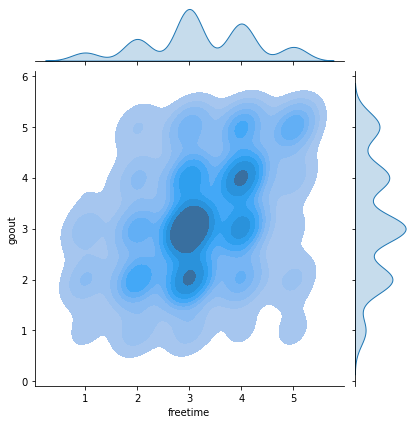

In [34]:
sns.jointplot(data=df_mat_por, x="freetime", y="goout", kind="kde", fill=True)
plt.show()

Właściwie z wykresu nie wynika żadna zalezność, a punkty rozłożone są równomiernie. Można odrzucić tę hipotezę.

## Hipoteza 4: Osoby z lepszymi ocenami z j. portugalskiego mają też lepsze oceny z matematyki

In [53]:
columns = list(df_mat)[:-4]
# ponieważ nie ma unikalnego klucza identyfikującego daną osobę, uznamy, że w przypadku wszystkich tych samych wartości
# (z wyjątkiem 4 ostatnich będących liczbą nieobecności i ocenami) w obu ramkach danych - mamy do czynienia z tą samą osobą 
df_hip4 = df_por.merge(df_mat, on = columns, how = 'inner')
df_hip4

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences_x,G1_x,G2_x,G3_x,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,4,0,11,11,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,2,9,11,11,4,5,5,6
2,GP,M,16,U,LE3,T,2,2,other,other,...,1,3,0,13,12,13,0,12,12,11
3,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,1,2,10,13,13,6,6,5,6
4,GP,F,15,U,GT3,T,2,1,services,other,...,1,4,0,10,12,13,4,10,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,MS,M,19,R,GT3,T,1,1,other,services,...,3,5,0,5,8,0,0,6,5,0
158,MS,M,18,R,GT3,T,4,2,other,other,...,3,3,0,7,7,0,14,6,5,5
159,MS,F,19,R,GT3,T,2,3,services,other,...,2,5,4,10,11,10,0,7,5,0
160,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,6,10,10,10,3,14,16,16


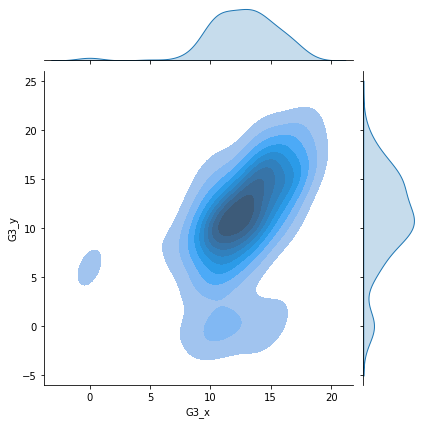

In [55]:
sns.jointplot(data=df_hip4, x="G3_x", y="G3_y", kind="kde", fill=True)
plt.show()

Rzeczywiście widać pewne podobieństwo w ocenach z j. portugalskiego i z matematyki, tzn. nie odrzucamy tej hipotezy.

## Hipoteza 5: Mężczyźni piją więcej alkoholu

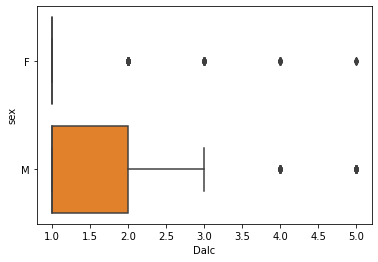

In [56]:
sns.boxplot(x="Dalc", y="sex", data=df_mat_por)
plt.show()

Pierwszy boxplot wyszedł w dosyć śmieszny sposób, ale pokazuje on, że hipoteza rzeczywiście może być prawdziwa. Wygenerujemy jeszcze drugiego boxplota, ale dla weekendów (ten powyżej jest dla spożywania alkoholu w dni robocze).

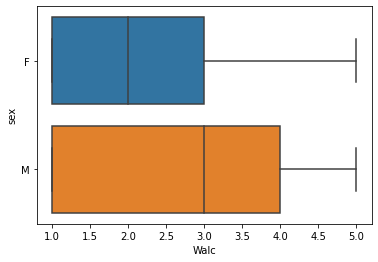

In [57]:
sns.boxplot(x="Walc", y="sex", data=df_mat_por)
plt.show()

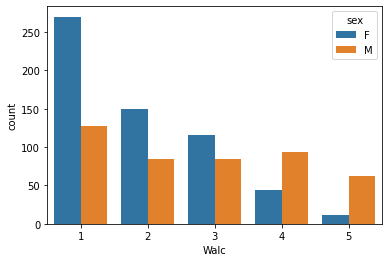

In [59]:
sns.countplot(x="Walc", hue="sex", data=df_mat_por)
plt.show()

Wszystkie trzy wykresy wskazują, że hipoteza będzie prawdziwa, zatem nie ma podstaw do jej odrzucenia.